c:\Users\Maroof\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Maroof\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


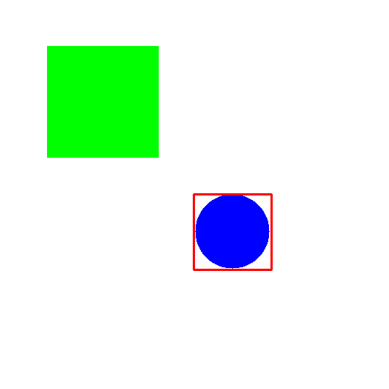

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Create a dummy image (3 color channels, RGB)
dummy_image = np.ones((500, 500, 3), dtype=np.uint8) * 255  # White background

# Draw a few shapes to simulate "objects"
cv2.rectangle(dummy_image, (50, 50), (200, 200), (0, 255, 0), -1)  # Green rectangle top-left and bottom-right corners, 
cv2.circle(dummy_image, (300, 300), 50, (255, 0, 0), -1)  # Blue circle (300, 300) is the center, 50 is the radius,

# Convert dummy image to tensor and normalize it for the model
image_tensor = F.to_tensor(dummy_image).unsqueeze(0) #normalize the image pixel values 0 to 1 convert into tensor,input shape ([batch_size, channels, height, width]).

# Perform inference
with torch.no_grad(): #disable the gradient calculation to speed up the prdiction
    predictions = model(image_tensor)

# Draw bounding boxes on the dummy image
predicted_boxes = predictions[0]['boxes'].cpu().numpy()
predicted_scores = predictions[0]['scores'].cpu().numpy()

# Threshold to visualize only confident predictions
threshold = 0.5

for box, score in zip(predicted_boxes, predicted_scores):
    if score >= threshold:
        # Draw bounding box
        start_point = (int(box[0]), int(box[1]))    #top-left and bottom-right coordinates of the bounding box
        end_point = (int(box[2]), int(box[3]))  #bottom-right
        cv2.rectangle(dummy_image, start_point, end_point, (0, 0, 255), 2)

# Display the result
plt.imshow(cv2.cvtColor(dummy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Lab Task 1: Understanding and Modifying Object Detection Model Loading
Objective: Understand the purpose of loading a pre-trained model and practice loading different models and understanding their layers.

Steps:

Import torch and torchvision libraries.
Load the fasterrcnn_resnet50_fpn model with pretrained=True and set it to evaluation mode (model.eval()).

Task 1.1: Print the model architecture to understand its layers. Identify and explain the function of at least three key components of the Faster R-CNN model.

Task 1.2: Explore other object detection models in torchvision.models.detection. Load an alternative model (e.g., retinanet_resnet50_fpn) and print its architecture to compare it with Faster R-CNN.
Expected Outcome:

A basic understanding of the model architecture and key components in Faster R-CNN and an exploration of an alternative model.

Lab Task 2: Creating and Preprocessing Dummy Data for Object Detection
Objective: Create a synthetic image with shapes to simulate "objects" and preprocess the image to prepare it for the model input.

Steps:

Use numpy to create a white image of size 500x500 pixels with three channels (RGB).
Use OpenCV (cv2) to draw at least two different shapes, simulating objects on the image:

Task 2.1: Draw a green rectangle and a blue circle, as shown in the original code.

Task 2.2: Add an additional shape of your choice (e.g., a red triangle or yellow ellipse).

Convert the created image to a PyTorch tensor using torchvision.transforms.functional.to_tensor and add a batch dimension (unsqueeze(0)).
Expected Outcome:

A dummy image with at least three distinct shapes representing "objects."
An understanding of the image-to-tensor conversion and normalization process for input into a pre-trained model.

Lab Task 3: Performing Object Detection and Drawing Bounding Boxes
Objective: Run inference on the dummy image using Faster R-CNN, filter predictions based on a confidence threshold, and visualize the bounding boxes.

Steps:

Use torch.no_grad() to disable gradient computation, making inference more efficient.
Perform inference on the image tensor using the Faster R-CNN model and extract boxes and scores from predictions.
Task 3.1: Set a confidence threshold (e.g., 0.5) and filter boxes with scores above the threshold.
Task 3.2: Draw bounding boxes on the original dummy image using OpenCV’s cv2.rectangle() function. Display the final image using matplotlib.pyplot.
Task 3.3: Experiment with different threshold values and observe how it affects the displayed bounding boxes. Document your findings.
Expected Outcome:

A visual output displaying bounding boxes around the detected shapes on the dummy image.
An understanding of the importance of confidence thresholds in filtering predictions.